In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
df = pd.read_parquet('snp_rsi_macd.parquet')
df.head()

,Date,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,YUM_RSI_MACD_Diff,ZBH_RSI_MACD,ZBH_RSI_Signal,ZBH_RSI_MACD_Diff,ZBRA_RSI_MACD,ZBRA_RSI_Signal,ZBRA_RSI_MACD_Diff,ZTS_RSI_MACD,ZTS_RSI_Signal,ZTS_RSI_MACD_Diff
0,2014-06-16,38.350628,38.708965,20.416189,35.777485,NaN,32.954800,19.000000,69.856163,67.620003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-06-17,38.712299,39.472588,20.389618,35.976246,NaN,32.921757,19.146667,69.594719,67.540001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-06-18,38.975353,40.217346,20.411760,36.155132,NaN,33.342968,19.116667,69.746536,73.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-06-19,38.547913,40.594452,20.340904,35.903366,NaN,33.863312,19.236668,70.058617,72.949997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-06-20,38.646549,41.999138,20.130541,35.313713,NaN,33.739433,19.180000,70.117645,72.610001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Ensure 'Date' column is the index
df.set_index('Date', inplace=True)

# Convert all columns to numeric, coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

df.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,YUM_RSI_MACD_Diff,ZBH_RSI_MACD,ZBH_RSI_Signal,ZBH_RSI_MACD_Diff,ZBRA_RSI_MACD,ZBRA_RSI_Signal,ZBRA_RSI_MACD_Diff,ZTS_RSI_MACD,ZTS_RSI_Signal,ZTS_RSI_MACD_Diff
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-16,38.350628,38.708965,20.416189,35.777485,NaN,32.954800,19.000000,69.856163,67.620003,44.788002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-17,38.712299,39.472588,20.389618,35.976246,NaN,32.921757,19.146667,69.594719,67.540001,44.949406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-18,38.975353,40.217346,20.411760,36.155132,NaN,33.342968,19.116667,69.746536,73.080002,44.489426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-19,38.547913,40.594452,20.340904,35.903366,NaN,33.863312,19.236668,70.058617,72.949997,44.328022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20,38.646549,41.999138,20.130541,35.313713,NaN,33.739433,19.180000,70.117645,72.610001,44.134335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Transpose the DataFrame to have dates as index and stocks as columns
df_prices = df.transpose()
df_prices

Date,2014-06-16,2014-06-17,2014-06-18,2014-06-19,2014-06-20,2014-06-23,2014-06-24,2014-06-25,2014-06-26,2014-06-27,...,2024-06-03,2024-06-04,2024-06-05,2024-06-06,2024-06-07,2024-06-10,2024-06-11,2024-06-12,2024-06-13,2024-06-14
A,38.350628,38.712299,38.975353,38.547913,38.646549,38.212524,37.910042,38.120468,38.021839,37.897930,...,131.399994,130.850006,133.559998,132.820007,132.979996,133.029999,132.110001,133.160004,130.570007,129.850006
AAL,38.708965,39.472588,40.217346,40.594452,41.999138,41.820004,40.707573,41.395775,41.999138,41.480633,...,11.530000,11.500000,11.620000,11.430000,11.500000,11.490000,11.280000,11.500000,11.440000,11.280000
AAPL,20.416189,20.389618,20.411760,20.340904,20.130541,20.112831,19.991039,20.008753,20.128325,20.367476,...,194.029999,194.350006,195.869995,194.479996,196.889999,193.119995,207.149994,213.070007,214.240005,212.490005
ABBV,35.777485,35.976246,36.155132,35.903366,35.313713,35.611843,35.505840,36.440029,37.440475,37.625980,...,160.190002,162.139999,165.440002,168.570007,169.419998,170.460007,167.699997,166.089996,166.559998,168.589996
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.250000,147.080002,145.779999,147.000000,146.660004,148.070007,147.750000,149.320007,146.100006,145.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBRA_RSI_Signal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.666553,-0.463211,-1.596378,-2.621919,-3.574295,-4.433391,-5.226736,-5.973062,-6.508110,-7.002469
ZBRA_RSI_MACD_Diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.853728,-4.519057,-4.532667,-4.102162,-3.809504,-3.436385,-3.173380,-2.985304,-2.140191,-1.977437
ZTS_RSI_MACD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.061351,1.663868,1.237169,0.996976,0.755399,0.849390,1.309821,1.085969,0.152217,-0.569873
ZTS_RSI_Signal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.109368,4.420268,3.783648,3.226314,2.732131,2.355583,2.146430,1.934338,1.577914,1.148356


In [5]:
df_prices.columns

DatetimeIndex(['2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
               '2014-06-20', '2014-06-23', '2014-06-24', '2014-06-25',
               '2014-06-26', '2014-06-27',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

In [6]:
# Reset the index to make the stock tickers a separate column
df_prices.reset_index(inplace=True)

# Rename the first column from 'Date' to 'Stock'
df_prices.rename(columns={'index': 'Stock'}, inplace=True)
df_prices.head()

Date,Stock,2014-06-16 00:00:00,2014-06-17 00:00:00,2014-06-18 00:00:00,2014-06-19 00:00:00,2014-06-20 00:00:00,2014-06-23 00:00:00,2014-06-24 00:00:00,2014-06-25 00:00:00,2014-06-26 00:00:00,...,2024-06-03 00:00:00,2024-06-04 00:00:00,2024-06-05 00:00:00,2024-06-06 00:00:00,2024-06-07 00:00:00,2024-06-10 00:00:00,2024-06-11 00:00:00,2024-06-12 00:00:00,2024-06-13 00:00:00,2024-06-14 00:00:00
0,A,38.350628,38.712299,38.975353,38.547913,38.646549,38.212524,37.910042,38.120468,38.021839,...,131.399994,130.850006,133.559998,132.820007,132.979996,133.029999,132.110001,133.160004,130.570007,129.850006
1,AAL,38.708965,39.472588,40.217346,40.594452,41.999138,41.820004,40.707573,41.395775,41.999138,...,11.530000,11.500000,11.620000,11.430000,11.500000,11.490000,11.280000,11.500000,11.440000,11.280000
2,AAPL,20.416189,20.389618,20.411760,20.340904,20.130541,20.112831,19.991039,20.008753,20.128325,...,194.029999,194.350006,195.869995,194.479996,196.889999,193.119995,207.149994,213.070007,214.240005,212.490005
3,ABBV,35.777485,35.976246,36.155132,35.903366,35.313713,35.611843,35.505840,36.440029,37.440475,...,160.190002,162.139999,165.440002,168.570007,169.419998,170.460007,167.699997,166.089996,166.559998,168.589996
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.250000,147.080002,145.779999,147.000000,146.660004,148.070007,147.750000,149.320007,146.100006,145.970001


In [7]:
# Extract stock tickers, ensuring they are strings and filtering out any invalid entries
stock_tickers = df_prices['Stock'].apply(lambda x: str(x).upper()).tolist()

# Initialize dictionaries to store the industries and beta values
industries = {}
betas = {}

# Fetch industry and beta information for each stock
for ticker in stock_tickers:
    try:
        # Ensure ticker is valid by checking if it is an alphabetical string
        if ticker.isalpha():
            stock_info = yf.Ticker(ticker).info
            industries[ticker] = stock_info.get('industry', 'Unknown')
            betas[ticker] = stock_info.get('beta', float('nan'))
        else:
            industries[ticker] = 'Unknown'
            betas[ticker] = float('nan')
    except Exception as e:
        industries[ticker] = 'Unknown'
        betas[ticker] = float('nan')
        print(f"Could not retrieve data for {ticker}: {e}")

# Convert the industries and betas dictionaries to DataFrames
industries_df = pd.DataFrame.from_dict(industries, orient='index', columns=['Industry'])
betas_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

# Merge the industry and beta information with the original DataFrame
df_prices.set_index('Stock', inplace=True)
df_prices = df_prices.merge(industries_df, left_index=True, right_index=True, how='left')
df_prices = df_prices.merge(betas_df, left_index=True, right_index=True, how='left')

# Print the updated DataFrame with Industry and Beta information
print(df_prices.head())

       2014-06-16 00:00:00  2014-06-17 00:00:00  2014-06-18 00:00:00  \
Stock                                                                  
A                38.350628            38.712299            38.975353   
AAL              38.708965            39.472588            40.217346   
AAPL             20.416189            20.389618            20.411760   
ABBV             35.777485            35.976246            36.155132   
ABNB                   NaN                  NaN                  NaN   

       2014-06-19 00:00:00  2014-06-20 00:00:00  2014-06-23 00:00:00  \
Stock                                                                  
A                38.547913            38.646549            38.212524   
AAL              40.594452            41.999138            41.820004   
AAPL             20.340904            20.130541            20.112831   
ABBV             35.903366            35.313713            35.611843   
ABNB                   NaN                  NaN                

In [8]:
df_prices.reset_index(inplace=True)
df_prices.head()

,Stock,2014-06-16 00:00:00,2014-06-17 00:00:00,2014-06-18 00:00:00,2014-06-19 00:00:00,2014-06-20 00:00:00,2014-06-23 00:00:00,2014-06-24 00:00:00,2014-06-25 00:00:00,2014-06-26 00:00:00,...,2024-06-05 00:00:00,2024-06-06 00:00:00,2024-06-07 00:00:00,2024-06-10 00:00:00,2024-06-11 00:00:00,2024-06-12 00:00:00,2024-06-13 00:00:00,2024-06-14 00:00:00,Industry,Beta
0,A,38.350628,38.712299,38.975353,38.547913,38.646549,38.212524,37.910042,38.120468,38.021839,...,133.559998,132.820007,132.979996,133.029999,132.110001,133.160004,130.570007,129.850006,Diagnostics & Research,1.068
1,AAL,38.708965,39.472588,40.217346,40.594452,41.999138,41.820004,40.707573,41.395775,41.999138,...,11.620000,11.430000,11.500000,11.490000,11.280000,11.500000,11.440000,11.280000,Airlines,1.498
2,AAPL,20.416189,20.389618,20.411760,20.340904,20.130541,20.112831,19.991039,20.008753,20.128325,...,195.869995,194.479996,196.889999,193.119995,207.149994,213.070007,214.240005,212.490005,Consumer Electronics,1.250
3,ABBV,35.777485,35.976246,36.155132,35.903366,35.313713,35.611843,35.505840,36.440029,37.440475,...,165.440002,168.570007,169.419998,170.460007,167.699997,166.089996,166.559998,168.589996,Drug Manufacturers - General,0.582
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.779999,147.000000,146.660004,148.070007,147.750000,149.320007,146.100006,145.970001,Travel Services,1.188


In [9]:
df_prices[['Stock', 'Industry', 'Beta']]

,Stock,Industry,Beta
0,A,Diagnostics & Research,1.068
1,AAL,Airlines,1.498
2,AAPL,Consumer Electronics,1.250
3,ABBV,Drug Manufacturers - General,0.582
4,ABNB,Travel Services,1.188
...,...,...,...
4019,ZBRA_RSI_Signal,NaN,NaN
4020,ZBRA_RSI_MACD_Diff,NaN,NaN
4021,ZTS_RSI_MACD,Unknown,NaN
4022,ZTS_RSI_Signal,NaN,NaN


In [10]:
# Save the DataFrame as a Parquet file
df_prices.to_parquet('snp_rsi_macd.parquet', index=False)

array([[<Axes: title={'center': 'Beta'}>]], dtype=object)

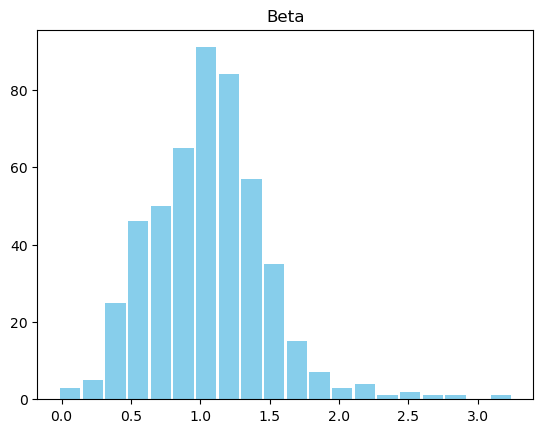

In [11]:
df_prices.hist(column='Beta', bins=20, grid=False, color='skyblue', zorder=2, rwidth=0.9)

In [12]:
df_prices = pd.read_parquet('snp_rsi_macd.parquet')

In [13]:
df_prices.head()

,Stock,2014-06-16 00:00:00,2014-06-17 00:00:00,2014-06-18 00:00:00,2014-06-19 00:00:00,2014-06-20 00:00:00,2014-06-23 00:00:00,2014-06-24 00:00:00,2014-06-25 00:00:00,2014-06-26 00:00:00,...,2024-06-05 00:00:00,2024-06-06 00:00:00,2024-06-07 00:00:00,2024-06-10 00:00:00,2024-06-11 00:00:00,2024-06-12 00:00:00,2024-06-13 00:00:00,2024-06-14 00:00:00,Industry,Beta
0,A,38.350628,38.712299,38.975353,38.547913,38.646549,38.212524,37.910042,38.120468,38.021839,...,133.559998,132.820007,132.979996,133.029999,132.110001,133.160004,130.570007,129.850006,Diagnostics & Research,1.068
1,AAL,38.708965,39.472588,40.217346,40.594452,41.999138,41.820004,40.707573,41.395775,41.999138,...,11.620000,11.430000,11.500000,11.490000,11.280000,11.500000,11.440000,11.280000,Airlines,1.498
2,AAPL,20.416189,20.389618,20.411760,20.340904,20.130541,20.112831,19.991039,20.008753,20.128325,...,195.869995,194.479996,196.889999,193.119995,207.149994,213.070007,214.240005,212.490005,Consumer Electronics,1.250
3,ABBV,35.777485,35.976246,36.155132,35.903366,35.313713,35.611843,35.505840,36.440029,37.440475,...,165.440002,168.570007,169.419998,170.460007,167.699997,166.089996,166.559998,168.589996,Drug Manufacturers - General,0.582
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.779999,147.000000,146.660004,148.070007,147.750000,149.320007,146.100006,145.970001,Travel Services,1.188
